In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("nn/max_mag_by_month.csv")
data.head()

,time,A,B,C,D,E,F,G
0,1960-01-01,0.0,0.0,0.0,6.3,0.0,0.0,0.0
1,1960-02-01,0.0,0.0,0.0,0.0,0.0,6.1,0.0
2,1960-03-01,0.0,0.0,0.0,0.0,0.0,8.0,0.0
3,1960-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1960-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dataA = data.A[data.A > 4]

(array([  4.,   5.,  43.,  35.,  49., 122.,  49.,  51.,  79.,  29.,  31.,
         28.,  16.,  12.,  30.,   5.,   9.,   4.,   1.,   9.,   1.,   2.,
          3.,   0.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([4.1       , 4.23533333, 4.37066667, 4.506     , 4.64133333,
        4.77666667, 4.912     , 5.04733333, 5.18266667, 5.318     ,
        5.45333333, 5.58866667, 5.724     , 5.85933333, 5.99466667,
        6.13      , 6.26533333, 6.40066667, 6.536     , 6.67133333,
        6.80666667, 6.942     , 7.07733333, 7.21266667, 7.348     ,
        7.48333333, 7.61866667, 7.754     , 7.88933333, 8.02466667,
        8.16      ]),
 <BarContainer object of 30 artists>)

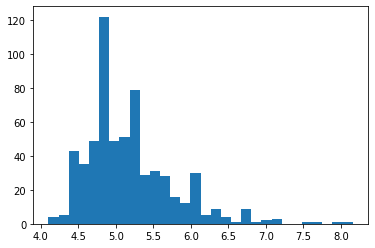

In [9]:
plt.hist(dataA, bins=30)

In [15]:
dataA_scaled = (dataA - 4) / dataA.std()   # b_k = 4 et a_k = std

<AxesSubplot:xlabel='A', ylabel='Density'>

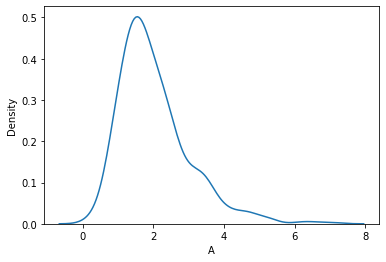

In [16]:
sns.kdeplot(dataA_scaled)

In [17]:
from scipy.stats import genextreme as gnx

In [18]:
param = gnx.fit(dataA_scaled)

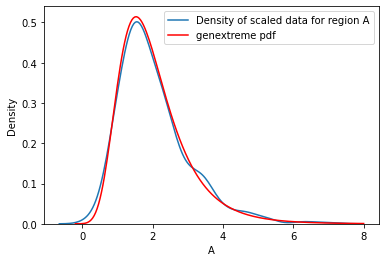

In [26]:
c, loc, scale = param
x = np.linspace(-.2, 8, 200)

sns.kdeplot(dataA_scaled, label='Density of scaled data for region A')
plt.plot(x, gnx.pdf(x, *param), color='red', label='genextreme pdf')
plt.legend()